## Exploratory Data Analysis: Management Consulting Salaries (2021)

In [212]:
import pandas as pd 
from matplotlib import pyplot as plt  
import numpy as np 
import matplotlib.style as style
import seaborn as sns 

#### Importing our consulting salaries dataset  

In [213]:
xls = pd.ExcelFile('consulting_dataset.xlsx')
df_consult = xls.parse(1)

#### Lets run some code to understand the basic structure of this dataset 

In [214]:
df_consult.head(5)

,Timestamp,Do you CURRENTLY work at a consulting firm?,Which firm do you CURRENTLY work for?,Are you CURRENTLY in a Commercial or Federal practice?,Title,What COUNTRY are you CURRENTLY based out of?,"What is your CURRENT annual base compensation in USD (not including bonuses, perks, or other incentives)? Please consult Google for conversion tools for local currency into USD. Enter number values only.",What is the total amount in USD of BONUSES you estimate you will receive in 2021? Enter number only.,Expected total compensation (calculated),How many hours per week on AVERAGE do you work (including non-billable time)?,Have you gotten an OFFER from another company this year?,Was the offer from another CONSULTING FIRM?,Which firm was the HIGHEST (base compensation) OFFER from?,Was the OFFER for a Commercial or Federal practice?,What was the OFFERED title (or equivalent)?,What COUNTRY was the OFFER based out of?,"What was the HIGHEST OFFERED annual base compensation in USD (not including bonuses, perks, or other incentives)? Please consult Google for conversion tools for local currency into USD. Enter a number only.",What was the total annual BONUS OFFERED?,Did you accept the offer?
0,2021-09-29 10:35:35.873,Yes,Other or Boutique,Commercial/non-federal Practice,Consultant/Associate,United States of America,147000.0,17000.0,164000.0,50-59,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-29 10:35:44.597,Yes,McKinsey,Commercial/non-federal Practice,Senior Manager,Malaysia,142000.0,50000.0,192000.0,60-69,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-29 10:36:00.369,Yes,Deloitte,Commercial/non-federal Practice,Senior Consultant/Senior Associate,United States of America,150000.0,30000.0,180000.0,40-49,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-29 10:36:16.228,Yes,Deloitte,Federal/government Practice,Senior Consultant/Senior Associate,United States of America,95000.0,10000.0,105000.0,40-49,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-29 10:36:19.761,Yes,Kearney,Commercial/non-federal Practice,Consultant/Associate,United States of America,165000.0,32000.0,197000.0,70-79,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's investigate extent of missing values in the survey data 

In [215]:
for col in df_consult.columns:
    percent_missing = np.mean(df_consult[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing*100)))
        

Timestamp - 0%
Do you CURRENTLY work at a consulting firm? - 0%
Which firm do you CURRENTLY work for? - 7%
Are you CURRENTLY in a Commercial or Federal practice?  - 7%
Title - 7%
What COUNTRY are you CURRENTLY based out of? - 0%
What is your CURRENT annual base compensation in USD (not including bonuses, perks, or other incentives)? Please consult Google for conversion tools for local currency into USD. Enter number values only. - 0%
What is the total amount in USD of BONUSES you estimate you will receive in 2021? Enter number only. - 0%
Expected total compensation (calculated) - 0%
How many hours per week on AVERAGE do you work (including non-billable time)? - 0%
Have you gotten an OFFER from another company this year? - 0%
Was the offer from another CONSULTING FIRM? - 74%
Which firm was the HIGHEST (base compensation) OFFER from? - 85%
Was the OFFER for a Commercial or Federal practice?  - 85%
What was the OFFERED title (or equivalent)?  - 85%
What COUNTRY was the OFFER based out of?

#### Let's get the basic descriptive characteristics of the dataset down 

In [216]:
df_consult.describe()
df_consult.describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))

,"What is your CURRENT annual base compensation in USD (not including bonuses, perks, or other incentives)? Please consult Google for conversion tools for local currency into USD. Enter number values only.",What is the total amount in USD of BONUSES you estimate you will receive in 2021? Enter number only.,Expected total compensation (calculated),"What was the HIGHEST OFFERED annual base compensation in USD (not including bonuses, perks, or other incentives)? Please consult Google for conversion tools for local currency into USD. Enter a number only.",What was the total annual BONUS OFFERED?
count,4200,4200,4200,1112,1112
mean,95114.8,34095.5,129210,107390,30363.7
std,71471.5,802993,809172,106158,258273
min,0,0,0,0,0
25%,56380,3000,63000,51950,2000
50%,86000,8000,96500,95000,10000
75%,124000,18000,143000,135000,20000
max,1.63e+06,5e+07,5e+07,1.3e+06,6.9e+06


#### Let's rename some key wordy columns so we can move faster through the rest of our code 

In [217]:
df_consult.rename({'Do you CURRENTLY work at a consulting firm?':'current_former',
                   'avg_hours_worked':'How many hours per week on AVERAGE do you work (including non-billable time)',
                      'Title':'role_title',
                      'What COUNTRY are you CURRENTLY based out of?':'country',
                      'What is your CURRENT annual base compensation in USD (not including bonuses, perks, or other incentives)? Please consult Google for conversion tools for local currency into USD. Enter number values only.':'annual_base_comp',
                      'What is the total amount in USD of BONUSES you estimate you will receive in 2021? Enter number only.':'bonus',
                      'Expected total compensation (calculated)':'estimated_total_comp',
                      'How many hours per week on AVERAGE do you work (including non-billable time)?':'avg_weekly_hours_worked',
                      'Which firm do you CURRENTLY work for?':'firm','What is your CURRENT title (or equivalent)?':'role_title'}, axis =1, inplace = True)         

#### Lets find the average annual base compensation by title for survey participants who are currently employed 

In [218]:
df_title = df_consult[['annual_base_comp', 'role_title', 'current_former']]
df_title_yes = df_title[df_title.current_former == 'Yes']
df_roles = df_title_yes.groupby(['role_title'])['annual_base_comp'].mean('annual_base_comp').sort_values().reset_index()
df_roles

,role_title,annual_base_comp
0,Intern,29558.253926
1,Analyst,58295.002333
2,Consultant/Associate,72184.766772
3,Senior Consultant/Senior Associate,89812.901292
4,Manager,121382.931155
5,Senior Manager,151997.606160
6,"Managing Director, Principal, Partner, or C-suite",222445.814159


#### Let's visualize the salaries so we can get a picture of salaries across the industry

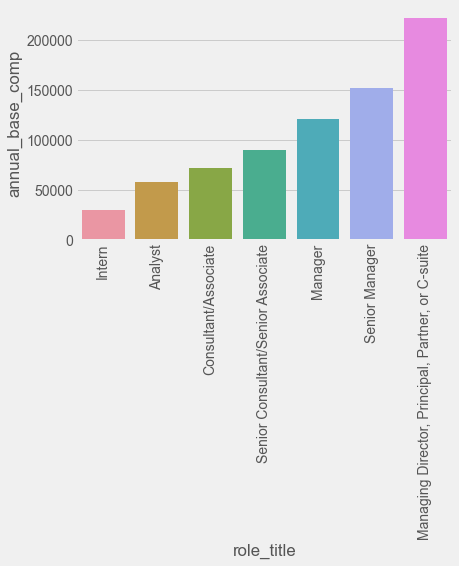

In [219]:
style.use('fivethirtyeight')
roles_plot = sns.barplot(x = 'role_title', y = 'annual_base_comp', data = df_roles)
roles_plot.tick_params(axis ='x', rotation= 90)


#### Now, let's see which of the consulting firms pays the most at entry level in the US specifically

In [220]:
df_consult.country.unique()
df_firm = df_consult.loc[df_consult['role_title'] == 'Analyst', ['country', 'annual_base_comp', 'firm', 'role_title']]
df_US_salaries = df_firm.loc[(df_firm['country'] == 'United States of America')]
df_US_salaries.groupby(['firm'])['annual_base_comp'].mean('annual_base_comp').sort_values(ascending = False).reset_index()



,firm,annual_base_comp
0,Kearney,115000.000000
1,Bain,100000.000000
2,EY Parthenon,100000.000000
3,McKinsey,99500.000000
4,BCG,99285.714286
5,LEK,90000.000000
6,IBM,84000.000000
7,Accenture,83856.140351
8,Oliver Wyman,82500.000000
9,FTI,80000.000000


#### Now, let's compare C-Suite salaries across countries

In [221]:

df_firm.role_title.unique()
df_countries = df_consult.loc[df_consult['role_title'] == 'Managing Director, Principal, Partner, or C-suite']
df_c_suite = df_countries.groupby(['country'])['annual_base_comp'].mean('annual_base_comp').sort_values(ascending = False).reset_index()
df_c_suite

,country,annual_base_comp
0,India,500000.000000
1,Germany,391833.333333
2,Denmark,255000.000000
3,United States of America,252708.510638
4,Malaysia,230000.000000
5,Indonesia,220000.000000
6,Canada,216550.000000
7,Sweden,210000.000000
8,South Africa,207500.000000
9,Belgium,196000.000000


#### Now, let's compare entry level salaries across countries

In [222]:
df_countries = df_firm[(df_firm['role_title'] == 'Analyst')]
df_entry_country = df_countries.groupby(['country'])['annual_base_comp'].mean('annual_base_comp').sort_values(ascending = False).reset_index()
df_entry_country

,country,annual_base_comp
0,Switzerland,102800.000000
1,Norway,88666.666667
2,United States of America,80686.683099
3,Sweden,73103.500000
4,Finland,63066.666667
5,Australia,61514.285714
6,Serbia,60000.000000
7,Germany,58819.000000
8,Canada,57540.777778
9,United Arab Emirates,56791.806667


#### Let's visualize the country spread of entry level salaries

[Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Annual Base Salary'),
 Text(0.5, 1.0, 'Entry level salaries in Consulting Industry (USD)')]

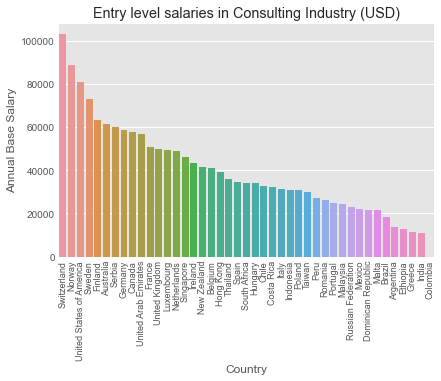

In [223]:
style.use('ggplot')
country_plot = sns.barplot(x = 'country', y = 'annual_base_comp', data = df_entry_country)
country_plot.tick_params(axis ='x', rotation = 90,labelsize =9)
country_plot.set_xlabel('Country', fontsize = 12 )
country_plot.set(xlabel ='Country', ylabel ='Annual Base Salary', title ='Entry level salaries in Consulting Industry (USD)')

#### Finally, let's investigate the correlation between how many hours entry level analysts work and their bonuses and annual compensation 

In [224]:
df_corr = df_consult.loc[df_consult['role_title']== 'Analyst',
                         ['bonus', 'avg_weekly_hours_worked', 'role_title', 'annual_base_comp']]
df_corr



,bonus,avg_weekly_hours_worked,role_title,annual_base_comp
10,16500.0,50-59,Analyst,85000.0
25,1100.0,40-49,Analyst,5200.0
28,5000.0,40-49,Analyst,69000.0
39,4000.0,60-69,Analyst,86000.0
42,5000.0,50-59,Analyst,59000.0
...,...,...,...,...
4184,12750.0,60-69,Analyst,80000.0
4189,6500.0,60-69,Analyst,80.0
4190,5000.0,40-49,Analyst,40000.0
4191,6400.0,40-49,Analyst,80000.0


#### For this analysis, we will take only the top of the range from the average hours worked column, so we'll only use the last 2 numbers in each entry 



In [225]:
#Do some data cleaning 
df_corr['hours'] = df_corr['avg_weekly_hours_worked'].astype(str).str[3:]
df_corr['hours'].unique()
df_int = df_corr[df_corr["hours"].str.contains('applicable/not currently working')== False]
df_corr_final = df_int.drop(['avg_weekly_hours_worked', 'role_title'], axis = 1)
df_corr_final['hours'].unique()
df_corr_final['hours'] = pd.to_numeric(df_corr_final['hours'])
df_corr_final



,bonus,annual_base_comp,hours
10,16500.0,85000.0,59.0
25,1100.0,5200.0,49.0
28,5000.0,69000.0,49.0
39,4000.0,86000.0,69.0
42,5000.0,59000.0,59.0
...,...,...,...
4184,12750.0,80000.0,69.0
4189,6500.0,80.0,69.0
4190,5000.0,40000.0,49.0
4191,6400.0,80000.0,49.0


####  Building correlation matrix 

[Text(0.5, 1.0, 'Compensation, bonuses, and hours worked')]

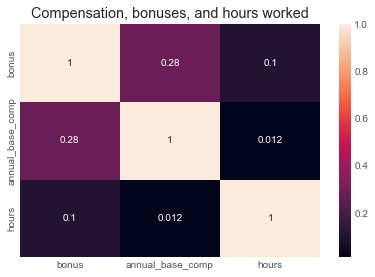

In [226]:
heatmap = sns.heatmap(df_corr_final.corr(), annot = True)
heatmap.set(title = 'Compensation, bonuses, and hours worked')

From our correlation matrix, it seems there isn't a strong link between how many hours entry level analysts 
work and their bonuses. 